# **Data Correlation**

# 1. Imports, Options and Ingestion

In [2]:
# Imports list

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [3]:
# Style is important
sns.set(style="white")

# Ensuring pandas always prints all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 1000)

%config InlineBackend.figure_format = 'retina'

In [5]:
# Reading the csv data

data = pd.read_csv('data_exploration.csv', index_col='customer_id')

In [6]:
subset_df = data[
    (data['regular'] == 1) & 
    (~data['loyal_flag']) & 
    (~data['foodie_flag']) &
    (~data['gluttonous_flag'])
].copy(deep=True)

In [7]:
subset_df.info() # Load OK

<class 'pandas.core.frame.DataFrame'>
Index: 22599 entries, 118371798366 to 1087714341088
Data columns (total 99 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cust_region               22599 non-null  int64  
 1   cust_age                  22599 non-null  int64  
 2   n_vendor                  22599 non-null  int64  
 3   n_product                 22599 non-null  int64  
 4   n_chain                   22599 non-null  int64  
 5   first_order               22495 non-null  float64
 6   last_order                22599 non-null  int64  
 7   last_promo                22599 non-null  object 
 8   pay_method                22599 non-null  object 
 9   American                  22599 non-null  float64
 10  Asian                     22599 non-null  float64
 11  Beverages                 22599 non-null  float64
 12  Cafe                      22599 non-null  float64
 13  Chicken Dishes            22599 non-null  float

## Correlation Matrices

In [ ]:
# Categorical variables
non_metric_features = ['cust_region', 'last_promo', 'pay_method', 'ordered_cuisines']

# Hour of day variables
hour_features = list(subset_df.columns[31:55]) + list(subset_df.columns[93:117])

# Day of week variables
day_features = list(subset_df.columns[24:31]) + list(subset_df.columns[86:93])

# Cusine features
cuisine_features = list(subset_df.columns[9:24]) + list(subset_df.columns[71:86])

# Metric variables, that are not above
metric_features = subset_df.columns.drop(non_metric_features).drop(hour_features).drop(day_features).drop(cuisine_features).to_list()[:18]

# Hour of day variables
hour_features = list(subset_df.columns[31:55])

# # Day of week variables
day_features = list(subset_df.columns[24:31])

# # Cusine features
cuisine_features = list(subset_df.columns[9:24])



### Metric Features

In [ ]:
# compute the correlation matrix for the metric features
corr_matrix = subset_df[metric_features].corr(method='pearson')

plt.figure(figsize=(15,12))

# create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

annot = np.full(corr_matrix.shape, '', dtype=object)

# Fill the annotation array with formatted values for correlations above the threshold
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if abs(corr_matrix.iat[i, j]) >= 0.3:
            annot[i, j] = f"{corr_matrix.iat[i, j]:.2f}" 

# create the heatmap
sns.heatmap(data=corr_matrix, annot=annot, cmap='vlag', 
            fmt="", center=0, vmin=-1, vmax=1, square=True, 
            linewidths=.5, mask=mask, annot_kws={"size": 10})

# Show the plot
plt.title('Metric Features Pearson Correlation Heatmap')
plt.show()

### Day Features

In [ ]:
# compute the correlation matrix for the day features
corr_matrix = subset_df[day_features].corr(method='pearson')

plt.figure(figsize=(12,10))

# create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

annot = np.full(corr_matrix.shape, '', dtype=object)

# Fill the annotation array with formatted values for correlations above the threshold
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if abs(corr_matrix.iat[i, j]) >= 0.3:
            annot[i, j] = f"{corr_matrix.iat[i, j]:.2f}" 

# create the heatmap
sns.heatmap(data=corr_matrix, annot=annot, cmap='vlag',
            fmt="", center=0, vmin=-1, vmax=1, square=True, 
            linewidths=.5, mask=mask, annot_kws={"size": 10})

# Show the plot
plt.title('Day Features Pearson Correlation Heatmap')
plt.show()

I don't think there is anything relevant in this graph.

### Hour Features

In [ ]:
# compute the correlation matrix for the hour features
corr_matrix = subset_df[hour_features].corr(method='pearson')

plt.figure(figsize=(25,15))

# create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

annot = np.full(corr_matrix.shape, '', dtype=object)

# Fill the annotation array with formatted values for correlations above the threshold
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if abs(corr_matrix.iat[i, j]) >= 0.3:
            annot[i, j] = f"{corr_matrix.iat[i, j]:.2f}" 

# create the heatmap
sns.heatmap(data=corr_matrix, annot=annot, cmap='vlag',
            fmt="", center=0, vmin=-1, vmax=1, square=True, 
            linewidths=.5, mask=mask, annot_kws={"size": 6.5})

# Show the plot
plt.title('Hour Features Pearson Correlation Heatmap')
plt.show()

There is nothing relevant here.

### Cuisine Features

In [ ]:
# compute the correlation matrix for the cuisine features
corr_matrix = subset_df[cuisine_features].corr(method='pearson')

plt.figure(figsize=(15,12))

# create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

annot = np.full(corr_matrix.shape, '', dtype=object)

# Fill the annotation array with formatted values for correlations above the threshold
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if abs(corr_matrix.iat[i, j]) >= 0.3:
            annot[i, j] = f"{corr_matrix.iat[i, j]:.2f}" 

# create the heatmap
sns.heatmap(data=corr_matrix, annot=annot, cmap='vlag',
            fmt="", center=0, vmin=-1, vmax=1, square=True, 
            linewidths=.5, mask=mask, annot_kws={"size": 10})

# Show the plot
plt.title('Cuisine Features Pearson Correlation Heatmap')
plt.show()

There is nothing here.

### All Features (so far)

In [ ]:
# compute the correlation matrix for the cuisine features
corr_matrix = subset_df[metric_features[:15] + hour_features[:24] + day_features[:7] + cuisine_features[:15]].corr(method='pearson')

plt.figure(figsize=(50,38))

# create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask only the upper triangle

annot = np.full(corr_matrix.shape, '', dtype=object)

# Fill the annotation array with formatted values for correlations above the threshold
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if abs(corr_matrix.iat[i, j]) >= 0.3:
            annot[i, j] = f"{corr_matrix.iat[i, j]:.2f}" 

# create the heatmap
sns.heatmap(data=corr_matrix, annot=annot, cmap='vlag',
            fmt="", center=0, vmin=-1, vmax=1, square=True, 
            linewidths=.5, mask=mask, annot_kws={"size": 10})

# Show the plot
plt.title('All Features Pearson Correlation Heatmap')
plt.show()

The number of vendors, products and orders made in chained restaurants seem to be fairly correlated among themselves, which could mean that customers that order more products, order them from more distinct vendors and often from chained restaurants.

The total amount spent and the number of orders directly correlate with the number of products, as to be expected since the more products are bought, the more money is spent, and more likely it is for the products to have been bought on different occasions.

First order is inversely correlated with the number of vendors, products, purchases in chained restaurants and orders and the total amount spent - since it is a first order it makes sense that these values would be at their lowest.

The longer a person has been a customer, the more orders tend to be placed and bigger the number of vendors and products. However, the average days between each order is also bigger, which could mean that the customers are not buying as regularly, i.e. this a strong indicator that propensity towards consumption tends to deacelerate with time.

Regarding the hours, we can see two order spikes around lunch and dinner time, with the lunch time spike starting rather early which can indicate the orders of our workers that want to make sure their lunch is delivered in time for their lunch break. In addition, the afternoon hours seem to show autocorrelation between lagged hours, this means that if we know that someone usually buys at a certain time in the afternoon, it is likely they have made purchases at the previous hour - this likelyhood increases with the number of orders.

<span style='color:yellow'>Regarding the week days, it seems the number of orders has lower correlation with Friday and Saturday and that the days as customers is also less correlated with these two week days - this could mean our customer base tends to order more on the week days.</span>

Regarding the cuisines, the Asian cuisine shows high correlation with the total amount spent by a customer, implying that higher spenders tend to order chinese food; the Chicken dishes seem to be ordered a lot from chain restaurants; the OTHER cuisine gets a lot of orders with a bigger amount of products and from chain restaurants and is mostly consumed during the afternoon.
High spenders mostly spend their money on Asian, Street Food/Snacks, American and Japanese dishes, while the overall product volume is greatest in OTHER, Chinese, American and Asian. The cuisine on which customers tend to spend more money per order is on Street Food/Snacks.
OTHER is highly correlated with 4 days of the week - Monday to Thursday.

To sum up, when looking at cuisines and time, 4 o'clock in the afternoon seems to be a great time to eat some pasta xD

Regarding our customer base (i.e., people that have ordered more than once), we conclude we have found our 9 to 5 workers, as the days due inversely correlates with the working days of the week - this means that for those customers for which this correlation holds, we can say that they tend to order more often and below the average days to order threshold for which we would expect the average customer to place a new order.

In [ ]:
# # compute the correlation matrix for all the features
# corr_matrix = one_time[metric_features[:15] + hour_features[:24] + day_features[:7] + cuisine_features[:15]].corr(method='pearson')

# plt.figure(figsize=(50,38))

# # create a mask for the upper triangle
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask only the upper triangle

# annot = np.full(corr_matrix.shape, '', dtype=object)

# # Fill the annotation array with formatted values for correlations above the threshold
# for i in range(corr_matrix.shape[0]):
#     for j in range(corr_matrix.shape[1]):
#         if abs(corr_matrix.iat[i, j]) >= 0.3:
#             annot[i, j] = f"{corr_matrix.iat[i, j]:.2f}" 

# # create the heatmap
# sns.heatmap(data=corr_matrix, annot=annot, cmap='vlag',
#             fmt="", center=0, vmin=-1, vmax=1, square=True, 
#             linewidths=.5, mask=mask, annot_kws={"size": 10})

# # Show the plot
# plt.title('All Features one_time Pearson Correlation Heatmap')
# plt.show()

The one time customers tend to spend their money on Street Food/Snacks and Asian.

In [ ]:
# #Create a mask where values are greater than zero (indicating an order)
# mask = one_time[cuisine_features[:15]] > 0

# #Use mask to get the ordered cuisines for each row
# one_time['ordered_cuisines'] = mask.apply(
#     lambda row: next((cuisine for cuisine, ordered in row.items() if ordered), None), 
#     axis=1
# )
# plt.figure(figsize=(15, 8))
# #Display countplot for how many cuisines were ordered per customer
# sns.countplot(data=one_time, x='ordered_cuisines', color='black')
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
# filtered = one_time.loc[one_time['last_promo'] != 3, :]

In [ ]:
# sns.histplot(data=filtered, x='total_amt', hue='last_promo')

### Non-metric Features

In [ ]:
def TestIndependence(df, target_var, alpha=0.05):        
    results = {}

    for col in df[non_metric_features]:
        
        if col != target_var:
            contingency_table = pd.crosstab(df[target_var], df[col])
            chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

            results[col] = {
                "Chi-square statistic": chi2
                , "p-value": p
                , "Associated": p < alpha
            }

    results_df = pd.DataFrame(results).T
    
    return results_df

In [ ]:
for var in non_metric_features:
    print(var)
    display(TestIndependence(subset_df, var))

## Three-way ANOVA

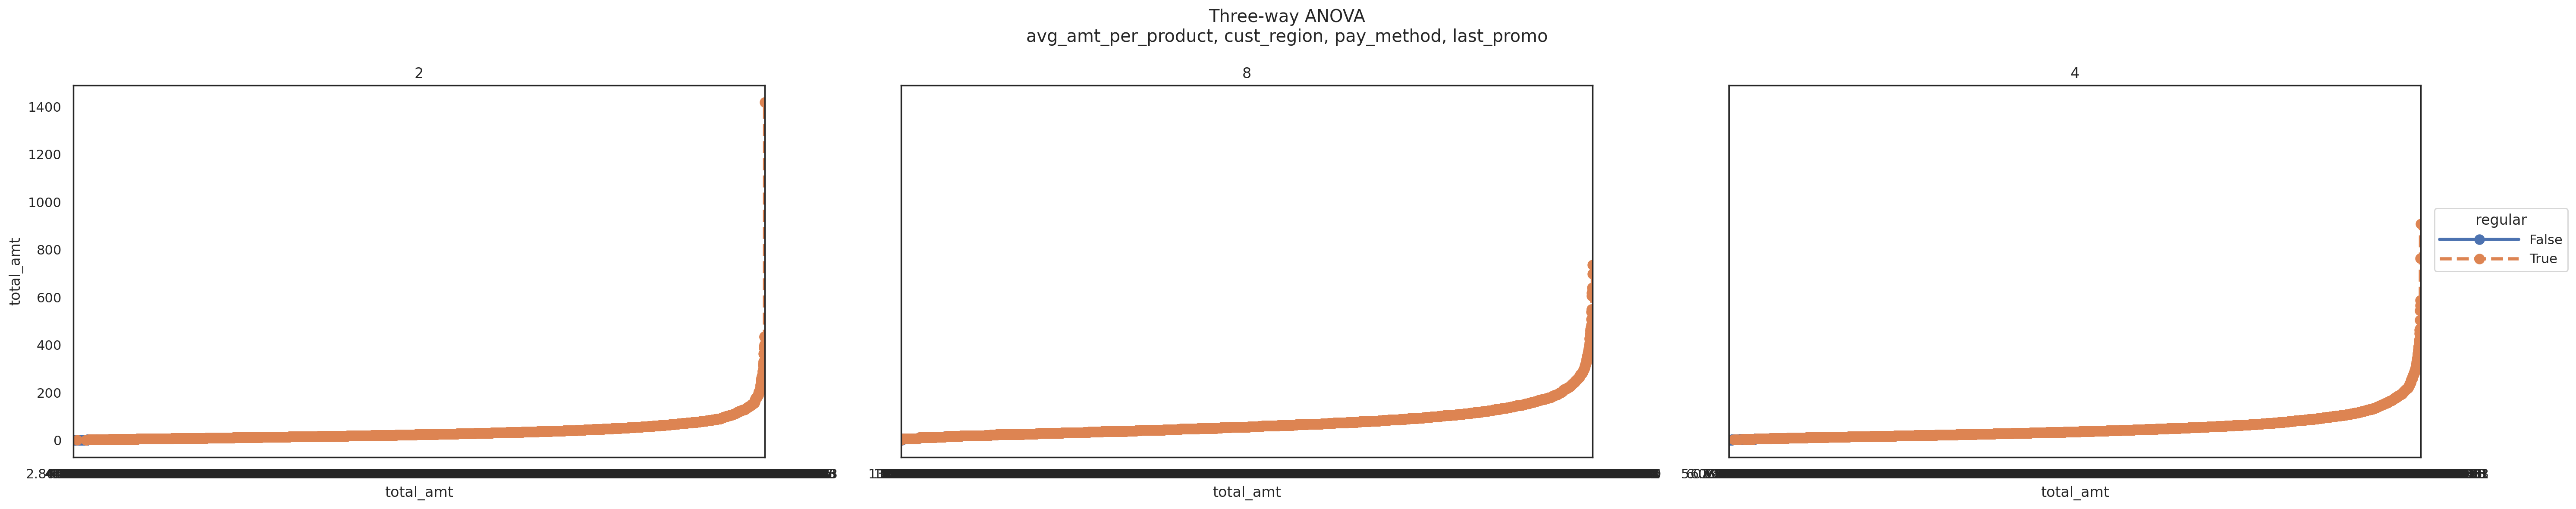

In [19]:
xfeat = 'total_amt'
huefeat='regular'
df_viz = data
regions = df_viz.cust_city.dropna().unique()

fig, axes = plt.subplots(1,len(regions), figsize=(30, 6), tight_layout=True, sharey=True)

for (axi, region_i) in zip(axes, regions):
    data_ = df_viz.loc[df_viz['cust_city']==region_i]
    
    sns.pointplot(data=data_, 
              y='total_amt', 
              x=xfeat, 
              hue=huefeat, 
              errorbar='sd',
              linestyles=["-", "--", ":", "-."],
              capsize=.1,
              ax=axi
              )

    axi.legend([], frameon=False)
    axi.set_title(region_i)

axes[-1].legend(loc=(1.02,.5), title=huefeat, handlelength=6)

fig.suptitle("Three-way ANOVA\navg_amt_per_product, cust_region, pay_method, last_promo")
plt.show()

In [15]:
subset_df['above_log_avg_amt_per_product'] = np.where(subset_df['log_avg_amt_per_product'] > 1.824, 1, 0)

In [ ]:
# We filter only those with dependents not missing
xfeat = 'above_log_avg_amt_per_product'
huefeat='last_promo'
df_viz = subset_df.loc[~subset_df[xfeat].isna()]
regions = df_viz.cust_region.dropna().unique()

fig, axes = plt.subplots(1,len(regions), figsize=(30, 6), tight_layout=True, sharey=True)

for (axi, region_i) in zip(axes, regions):
    data_ = df_viz.loc[df_viz['cust_region']==region_i]
    
    sns.pointplot(data=data_, 
              y='total_amt', 
              x=xfeat, 
              hue=huefeat, 
              errorbar='sd',
              linestyles=["-", "--", ":", "-."],
              capsize=.1,
              ax=axi
              )

    axi.legend([], frameon=False)
    axi.set_title(region_i)

axes[-1].legend(loc=(1.02,.5), title=huefeat, handlelength=6)

fig.suptitle("Three-way ANOVA\ntotal_amt, cust_region, pay_method, last_promo")
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

sns.violinplot(
    data=subset_df,
    x='cust_region',
    y='total_amt',
    hue='above_log_avg_amt_per_product',
    split=True,
    inner=None,
    fill=False
)

plt.show()

In [ ]:
rs = subset_df
x = rs.total_amt
g = rs.cust_region
h = rs.above_log_avg_amt_per_product
df = pd.DataFrame(dict(x=x, g=g, h=h))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="h", aspect=15, height=1.5, palette='Dark2')

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=0.5, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, lw=2, bw_adjust=.5, alpha=1)

# Passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(ax, region):
    ax.text(0, .2, f"Region {region}", fontweight="bold", color='black',
            ha="left", va="center", transform=ax.transAxes)

# Iterate over axes and unique region values
for ax, region in zip(g.axes.flat, df['g'].unique()):
    label(ax, region)  # Place the label in the correct subplot

# Adjust labels and titles
g.set(xlabel="total_amt")
g.set_titles(size=12)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# Show the plot
plt.show()

PairGrid

In [ ]:
features = non_metric_features + metric_features + day_features + hour_features + cuisine_features
sample_data = subset_df[features].sample(1000, random_state=20)

In [ ]:
# g = sns.PairGrid(data[features])
# g.map_lower(sns.scatterplot)  # or any other plot type
# g.map_diag(sns.kdeplot, fill=True)  # or sns.kdeplot for density plots

# for i in range(len(g.axes)):
#    for j in range(len(g.axes)):
#        if j > i:  # This identifies the upper triangle
#            g.axes[i, j].set_visible(False)  # Hide the axes

# g.fig.set_dpi(30)

# plt.show()

In [ ]:
subset_df['top_cuisine'] = subset_df[cuisine_features].idxmax(axis=1)

In [ ]:
def top_n(row, col_list, n):
    sorted_row = row[col_list].sort_values(ascending=False)
    if len(sorted_row) > n-1 and sorted_row.iloc[n-2] != sorted_row.iloc[n-1]:
        return sorted_row.index[n-1]
    else:
        return None

In [ ]:
subset_df['top2_cuisine'] = subset_df.apply(top_n, col_list=cuisine_features, n=2, axis=1)

In [ ]:
subset_df['top3_cuisine'] = subset_df.apply(top_n, col_list=cuisine_features, n=3, axis=1)

In [ ]:
g = sns.PairGrid(subset_df[['avg_days_to_order', 'days_due', 'per_chain_order', 'n_order', 'days_cust']])
g.map_lower(sns.scatterplot, hue=subset_df['n_cuisines'], alpha=0.1)
g.map_diag(sns.kdeplot, fill=True, color='#fdb0c0')

for i in range(len(g.axes)):
   for j in range(len(g.axes)):
       if j > i:  # This identifies the upper triangle
           g.axes[i, j].set_visible(False)  # Hide the axes

plt.show()

In [ ]:
import math

columns_list = cuisine_features
y_column = 'days_cust'

# Calculate the number of rows needed to have 3 columns
ncols = 3
nrows = math.ceil(len(columns_list) / ncols)  # This rounds up to ensure enough rows

# Set up the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows))

# Flatten axes for easy iteration if there's more than one row
axes = axes.flatten()

# Loop through each column and create a regression plot on each subplot
for i, col in enumerate(columns_list):
    sns.regplot(x=col, y=y_column, data=subset_df[subset_df[col] > 0], ax=axes[i], scatter_kws={'alpha': 0.1})
    axes[i].set_title(f'Regression of {y_column} on {col}')

# Hide any unused axes (if the number of plots is not a multiple of ncols)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the correlation matrix for the hour features
hour_correlation = subset_df[hour_features].corr()

# Create a clustermap using the correlation matrix
sns.clustermap(hour_correlation, cmap='vlag', linewidths=0.5, figsize=(10, 8))

# Show the plot
plt.title('Customer Activity Heatmap by Hour')
plt.show()

In [ ]:
rs = subset_df
x = rs.total_amt
g = rs.cust_region
df = pd.DataFrame(dict(x=x, g=g))
#m = df.g.map(ord)
df["x"] += df["g"]

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=1.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")
g.set(xlabel="total_amt")
g.set_titles(size=12)

# Set the subplots to overlap
#g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.show()

In [ ]:
g = sns.FacetGrid(subset_df, col='top_cuisine', col_wrap=4, height=3)
g.map(sns.histplot, 'total_amt', kde=True)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Histograms of Total Amount by Cuisine')
plt.show()

In [ ]:
last_order_total_amt = subset_df.groupby('last_order')['total_amt'].sum().reset_index()

sns.kdeplot(data=last_order_total_amt, x='last_order', y='total_amt')

plt.show()

In [ ]:
last_order_total_amt = subset_df.groupby('days_cust')['total_amt'].sum().reset_index()

sns.kdeplot(data=last_order_total_amt, x='days_cust', y='total_amt')

plt.show()

## Hour-Week Contingency Analysis

In [ ]:
dow_sums = subset_df[[f'DOW_{i}' for i in range(7)]].sum()
hr_sums = subset_df[[f'HR_{i}' for i in range(24)]].sum()

In [ ]:
# # Create a new DataFrame with each unique (day, hour) combination
# heatmap_data = pd.DataFrame(
#     {
#         'Day': [f'DOW_{i}' for i in range(7)] * 24,
#         'Hour': list(range(24)) * 7,
#         'Order_Count': [dow_sums[f'DOW_{i}'] * hr_sums[f'HR_{j}'] for i in range(7) for j in range(24)]
#     }
# )

# # Reshape for the heatmap plot
# heatmap_pivot = heatmap_data.pivot(index='Day', columns='Hour', values='Order_Count')

# # Plot heatmap
# plt.figure(figsize=(20, 12))
# sns.heatmap(heatmap_pivot, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={'label': 'Order Count'}, annot_kws={'size': 6}, square=True)
# plt.xlabel("Hour of the Day")
# plt.ylabel("Day of the Week")
# plt.title("Order Counts by Time of Day and Day of Week")
# plt.show()

### Expected Order Count Matrix for Hour-Day Pairs

In [ ]:
subset_df['DOW_total'] = subset_df[[f'DOW_{i}' for i in range(7)]].sum(axis=1)
for i in range(7):
    subset_df[f'Order_DOW_{i}'] = subset_df[f'DOW_{i}'] / subset_df['DOW_total']

subset_df['HR_total'] = subset_df[[f'HR_{i}' for i in range(24)]].sum(axis=1)
for i in range(24):
    subset_df[f'Order_HR_{i}'] = subset_df[f'HR_{i}'] / subset_df['HR_total']

subset_df.drop(columns=['DOW_total', 'HR_total'], inplace=True)

In [ ]:
heatmap_data = []

for i in range(7):  # For each day of the week
    for j in range(24):  # For each hour of the day
        # Calculate Order Count as the sum of products of the indicators
        order_count = (subset_df[f'Order_DOW_{i}'] * subset_df[f'Order_HR_{j}']).sum()
        
        heatmap_data.append({
            'Day': f'DOW_{i}',
            'Hour': j,
            'Order_Count': order_count
        })

# Convert heatmap_data into a DataFrame
heatmap_df = pd.DataFrame(heatmap_data)

# Reshape for the heatmap
heatmap_pivot = heatmap_df.pivot(index='Day', columns='Hour', values='Order_Count').fillna(0)

# Plot heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(heatmap_pivot, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={'label': 'Order Count'}, annot_kws={'size': 6}, square=True)
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Order Counts by Time of Day and Day of Week")
plt.show()

### Cramer's V Heatmap

In [ ]:
for i in range(7):  # For each day of the week
    subset_df[f'Has_DOW_{i}'] = (subset_df[f'DOW_{i}'] > 0).astype(int)

for j in range(24):  # For each hour of the day
    subset_df[f'Has_HR_{j}'] = (subset_df[f'HR_{j}'] > 0).astype(int)

In [ ]:
DOW_features = [f'Has_DOW_{i}' for i in range(7)]
HR_features = [f'Has_HR_{i}' for i in range(24)]

In [ ]:
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - 1
    kcorr = k - 1
    return np.sqrt(phi2corr / min((kcorr, rcorr)))

# Initialize a DataFrame to store the Cramér's V values
cramer_v_results = pd.DataFrame(index=[f'Has_DOW_{i}' for i in range(7)], columns=[f'Has_HR_{j}' for j in range(24)])

# Calculate Cramér's V for each DOW and HR combination
for i in range(7):
    for j in range(24):
        # Create contingency table
        contingency_table = pd.crosstab(subset_df[f'Has_DOW_{i}'], subset_df[f'Has_HR_{j}'])
        # Calculate Cramér's V
        cramer_v_value = cramers_v(contingency_table)
        cramer_v_results.loc[f'Has_DOW_{i}', f'Has_HR_{j}'] = cramer_v_value

# Optionally plot the heatmap of Cramér's V values
plt.figure(figsize=(15, 12))
sns.heatmap(cramer_v_results.astype(float), annot=True, cmap='YlGnBu', fmt=".2f", annot_kws={'size': 7}, cbar_kws={'label': "Cramér's V"}, square=True)
plt.title("Cramér's V Heatmap between Days of Week and Hours")
plt.xlabel("Hours")
plt.ylabel("Days of Week")
plt.show()

In [ ]:
# def cramers_v(confusion_matrix):
#     chi2 = stats.chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2 / n
#     r, k = confusion_matrix.shape
#     phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
#     rcorr = r - 1
#     kcorr = k - 1
#     return np.sqrt(phi2corr / min((kcorr, rcorr)))

# # Initialize a DataFrame to store the Cramér's V values
# cramer_v_results = pd.DataFrame(index=[f'Has_DOW_{i}' for i in range(7)], columns=[f'Has_HR_{j}' for j in range(24)])

# # Calculate Cramér's V for each DOW and HR combination
# for i in range(7):
#     for j in range(24):
#         # Create contingency table
#         contingency_table = pd.crosstab(data[f'Has_DOW_{i}'], data[f'Has_HR_{j}'])
#         # Calculate Cramér's V
#         cramer_v_value = cramers_v(contingency_table)
#         cramer_v_results.loc[f'Has_DOW_{i}', f'Has_HR_{j}'] = cramer_v_value * dow_sums[f'DOW_{i}'] * hr_sums[f'HR_{j}']

# # Optionally plot the heatmap of Cramér's V values
# plt.figure(figsize=(15, 12))
# sns.heatmap(cramer_v_results.astype(float), cmap='YlGnBu', fmt=".2f", annot_kws={'size': 7}, cbar_kws={'label': "Cramér's V"}, square=True)
# plt.title("Cramér's V Heatmap between Days of Week and Hours")
# plt.xlabel("Hours")
# plt.ylabel("Days of Week")
# plt.show()

### Expectation Weighted Cramer's V Heatmap

In [ ]:
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - 1
    kcorr = k - 1
    return np.sqrt(phi2corr / min((kcorr, rcorr)))

# Initialize a DataFrame to store the Cramér's V values
cramer_v_results = pd.DataFrame(index=[f'Has_DOW_{i}' for i in range(7)], columns=[f'Has_HR_{j}' for j in range(24)])

# Calculate Cramér's V for each DOW and HR combination
for i in range(7):
    for j in range(24):
        # Create contingency table
        contingency_table = pd.crosstab(subset_df[f'Has_DOW_{i}'], subset_df[f'Has_HR_{j}'])
        # Calculate Cramér's V
        cramer_v_value = cramers_v(contingency_table)
        cramer_v_results.loc[f'Has_DOW_{i}', f'Has_HR_{j}'] = cramer_v_value * (subset_df[f'Order_DOW_{i}'] * subset_df[f'Order_HR_{j}']).sum()

# Optionally plot the heatmap of Cramér's V values
plt.figure(figsize=(15, 12))
sns.heatmap(cramer_v_results.astype(float), cmap='YlGnBu', fmt=".2f", annot_kws={'size': 7}, cbar_kws={'label': "Cramér's V"}, square=True)
plt.title("Cramér's V Heatmap between Days of Week and Hours")
plt.xlabel("Hours")
plt.ylabel("Days of Week")
plt.show()

### (Absolute) Pearson's Correlation Heatmap

In [ ]:
pearson_corr = subset_df[DOW_features + HR_features].corr(method='pearson')

corr_subset = np.abs(pearson_corr.loc[DOW_features, HR_features])

plt.figure(figsize=(15,12))


annot = np.full(corr_subset.shape, '', dtype=object)

# Fill the annotation array with formatted values for correlations above the threshold
for i in range(corr_subset.shape[0]):
    for j in range(corr_subset.shape[1]):
        if abs(corr_subset.iat[i, j]) >= 0.3:
            annot[i, j] = f"{corr_subset.iat[i, j]:.2f}" 

# create the heatmap
sns.heatmap(data=corr_subset, annot=True, cmap='YlGnBu', 
            fmt=".2f", square=True, 
            linewidths=.5, annot_kws={"size": 10})

# Show the plot
plt.title('Pearson Correlation Heatmap')
plt.show()

#### <span style='color:yellow'>Expectation Weighted (Absolute of) Pearson's Correlation Heatmap</span>

In [ ]:
pearson_corr = subset_df[DOW_features + HR_features].corr(method='pearson')

corr_subset = np.abs(pearson_corr.loc[DOW_features, HR_features])

for i in range(7):
    for j in range(24):
        corr_subset.loc[f'Has_DOW_{i}', f'Has_HR_{j}'] = corr_subset.loc[f'Has_DOW_{i}', f'Has_HR_{j}'] * (subset_df[f'Order_DOW_{i}'] * subset_df[f'Order_HR_{j}']).sum()

plt.figure(figsize=(15,12))


annot = np.full(corr_subset.shape, '', dtype=object)

# Fill the annotation array with formatted values for correlations above the threshold
for i in range(corr_subset.shape[0]):
    for j in range(corr_subset.shape[1]):
        if abs(corr_subset.iat[i, j]) >= 0.3:
            annot[i, j] = f"{corr_subset.iat[i, j]:.2f}" 

# create the heatmap
sns.heatmap(data=corr_subset, cmap='YlGnBu', 
            fmt="", square=True
            )

# Show the plot
plt.title('Pearson Correlation Heatmap')
plt.show()

In [ ]:
# pearson_corr = data[DOW_features + HR_features].corr(method='pearson')

# corr_subset = pearson_corr.loc[DOW_features, HR_features]

# for i in range(7):
#     for j in range(24):
#         corr_subset.loc[f'Has_DOW_{i}', f'Has_HR_{j}'] = corr_subset.loc[f'Has_DOW_{i}', f'Has_HR_{j}'] * dow_sums[f'DOW_{i}'] * hr_sums[f'HR_{j}']

# plt.figure(figsize=(15,12))


# annot = np.full(corr_subset.shape, '', dtype=object)

# # Fill the annotation array with formatted values for correlations above the threshold
# for i in range(corr_subset.shape[0]):
#     for j in range(corr_subset.shape[1]):
#         if abs(corr_subset.iat[i, j]) >= 0.3:
#             annot[i, j] = f"{corr_subset.iat[i, j]:.2f}" 

# # create the heatmap
# sns.heatmap(data=corr_subset, cmap='YlGnBu', 
#             fmt="", square=True, 
#             annot_kws={"size": 10})

# # Show the plot
# plt.title('Pearson Correlation Heatmap')
# plt.show()

In [ ]:
average_vendor_by_age = subset_df.groupby('cust_age')['n_vendor'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 6))
sns.lineplot(data=average_vendor_by_age, x='cust_age', y='n_vendor', marker='o', alpha=0.6)
plt.title('Average Vendor Count by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Average Vendor Count')
plt.xticks(np.arange(average_vendor_by_age['cust_age'].min(), 
                       average_vendor_by_age['cust_age'].max() + 1, 3))
plt.grid(True)
plt.show()